# Homework 1
## Introduction
### Important dates
* Homework release: Thursday, 3rd October 2019
* **Homework due**: Wednesday, 16th October 2019 (23:59 hours, 11:59 PM)
* Peer review due: Wednesday, 23rd October 2019 (23:59 hours, 11:59 PM)
* Grading release: Wednesday, 30th October 2019

### Description

The data you'll be working with comes from multiple sources. The main data source will be [DBLP](https://dblp.uni-trier.de/), a database of publications from major computer science journals and conferences. A subset of DBLP, which you will use in this assignment, is provided to you via a [google drive folder](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view). Later on, you will enrich the DBLP data with a dataset on conference rankings and with the proceedings of the [NIPS conference](https://nips.cc/) [1] ('proceedings' is another word for the set of papers published at an academic conference). After loading and cleaning the data, you will answer various questions about its contents.

**Some rules:**
- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
- Make sure you use the data folder provided in the repository in *read-only* mode.
- Be sure to provide explanations for your answers. A notebook that only has code cells will not suffice.
- Also, be sure to *hand in a fully-run and evaluated notebook*. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

[1] Note that NIPS was renamed to NeurIPS in 2018, but for simplicity, whenever we say 'NIPS', we really mean 'NIPS and NeurIPS'.

## Task A. Getting a sense of the dataset

### A1. Loading the data
Download the DBLP dataset (available on [google drive](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view)) and load it into a Pandas dataframe. A row of your dataframe should look as follows:

| paper id | author names | publication year | paper title | 
| :----:|:-------------:| :-----:|:-----:|
| conf/nips/doe1036 | [John Doe, Jane Doe] | 2003 | Some Catchy Title: An Expanded and Boring Title | 


1. Filter the papers: keep only conference papers. For each of the remaining ones, find the acronym of the conference where it was published. Retain only those papers that have been published in the conferences listed in `data/list_of_ai_conferences.txt`. Additionally, add a column named 'conference' to your dataframe.   
_Hint: The `paper id` tells you whether a paper was published at a conference, and if so, at which one._

2. Report the overall number of papers in the filtered dataset, as well as the number of papers per conference.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

In [2]:
# Load original dblp file and conference text file
papers_raw = pd.read_csv("./data/dblp.tsv",
                   sep='\t',
                   names=["paper id", "author names", "publication year", "paper title"],
                   index_col=0,
                   skiprows=1)

ai_conferences = pd.read_csv("./data/list_of_ai_conferences.txt", names=["conference name"], index_col=0)

In [3]:
papers_raw.head()

,author names,publication year,paper title
paper id,,,
tr/meltdown/s18,"['Paul Kocher', 'Daniel Genkin', 'Daniel Gruss...",2018.0,Spectre Attacks: Exploiting Speculative Execut...
tr/meltdown/m18,"['Moritz Lipp', 'Michael Schwarz 0001', 'Danie...",2018.0,Meltdown
tr/acm/CS2013,[],2013.0,Computer Science Curricula 2013
tr/gte/TR-0263-08-94-165,['Frank Manola'],1994.0,An Evaluation of Object-Oriented DBMS Developm...
tr/gte/TR-0222-10-92-165,"['Michael L. Brodie', 'Michael Stonebraker']",1993.0,DARWIN: On the Incremental Migration of Legacy...


In [4]:
ai_conferences

""
conference name
cvpr
icra
iccv
icml
nips
acl
emnlp
aaai
aamas


In [6]:
# filter out those published in the conferences and add a new column specifying their conference name
papers_in_conf = papers_raw[papers_raw.index.map(lambda id: True if (id.split('/')[1] in ai_conferences.index) & (id.split('/')[0] == 'conf') else False)]
conf_names = papers_in_conf.index.to_series().map(lambda id: id.split('/')[1])
papers_in_conf = pd.concat([papers_in_conf, conf_names], axis = 1).rename(columns = {'paper id': 'conference'})
papers_in_conf.head()

,author names,publication year,paper title,conference
paper id,,,,
conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990.0,Object recognition using a feature search stra...,iccv
conf/iccv/VedulaBRCK99,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999.0,Three-Dimensional Scene Flow.,iccv
conf/iccv/MeminP99,"['Étienne Mémin', 'Patrick Pérez']",1999.0,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
conf/iccv/DickinsonPR90,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990.0,Qualitative 3-D shape reconstruction using dis...,iccv
conf/iccv/SinghYL17,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv


In [7]:
# Total number of filtered dataset
print('Total number of filtered dataset: {0}'.format(len(papers_in_conf)))

Total number of filtered dataset: 102003


In [8]:
# Number of papers per conference
print('Number of papers per conference: \n')
print(pd.DataFrame(papers_in_conf.groupby('conference').size().rename('Number')))

Number of papers per conference: 

            Number
conference        
aaai         10796
aamas          367
accv          2390
acl           6330
cvpr         12853
emnlp         3299
fgr           1383
icann         3134
iccbr          863
iccv          4179
icml          5017
iconip        4985
icra         21585
ida            712
ijcai         9669
ilp            679
ksem           635
naacl         3310
nips          8445
pricai        1372


### A2. An author-centric look
The dataframe you created above was a paper-centric one. Now, we want you to create a new dataframe centered around authors. Do this by expanding the author names in the lists in the 2nd column into separate rows. That is, if a paper has 3 authors, turn that row into 3 rows, each of which only contains one of the author names (along with the rest of the paper information, i.e., title, conference and year). Keep both dataframes, we are going to need both of them.    
**Report the number of unique authors.**

In [10]:
# Create a author-centric dataframe
authors_in_conf = (papers_in_conf['author names']
                  .apply(lambda x: x.strip('[]').replace('\'', '').split(', ')).apply(pd.Series)
                  .merge(papers_in_conf, left_index = True, right_index = True)
                  .drop(['author names'], axis = 1).reset_index()
                  .melt(id_vars = ['paper id', 'publication year', 'paper title', 'conference'], value_name = 'author')
                  .drop('variable', axis = 1)
                  .dropna(subset = ['author']))

authors_in_conf['author'] = authors_in_conf['author'].str.strip('/"')
authors_in_conf['author'] = authors_in_conf['author'].apply(lambda name: re.sub('\d+', "", name) if re.search('\d', name) else name)
authors_in_conf.head()

,paper id,publication year,paper title,conference,author
0,conf/iccv/KunoOO90,1990.0,Object recognition using a feature search stra...,iccv,Yoshinori Kuno
1,conf/iccv/VedulaBRCK99,1999.0,Three-Dimensional Scene Flow.,iccv,Sundar Vedula
2,conf/iccv/MeminP99,1999.0,Fluid Motion Recovery by Coupling Dense and Pa...,iccv,Étienne Mémin
3,conf/iccv/DickinsonPR90,1990.0,Qualitative 3-D shape reconstruction using dis...,iccv,Sven J. Dickinson
4,conf/iccv/SinghYL17,2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv,Avi Singh


In [11]:
# Number of unique authors
print('Total number of unique authors: {0}'.format(len(authors_in_conf['author'].unique())))

Total number of unique authors: 104773


### A3. Is your data analysis-friendly?

Using an appropriate view of your data (paper-centric or author-centric), solve the following tasks:

1. Plot the number of papers per author and analyze it. Do you observe any outliers? Can you identify the source of the problem? Please elaborate!   
_Hint: To find out where the problem comes from, try performing an analysis at the conference or year level._   
Make sure you remove this inconsistency from your dataframe before moving to the next step, and also create a new plot of the number of papers per author after fixing the problem.   

2. Plot the number of papers per year. Do you observe any inconsistency in the output? Real-world data is usually messy, with typos, erroneous entries, and sometimes issues that make even loading the data problematic. Fix any errors that you encounter along the way, find ways to clean the attribute `year`, and redo the plot of the number of papers per year.   

3. Machine learning (ML) has been one of the hottest topics within the broader area of AI recently, so let’s see if this is reflected in the number of ML publications. In particular, let’s focus on the two major ML conferences, NIPS and ICML: make a new dataframe with only NIPS and ICML papers (let’s call these the “ML papers”), plot the number of ML papers over time, and analyze and discuss the plot. Do you observe anything odd in this plot? What causes these problems?   
_Hint: Try to perform an analysis at the conference or year level._   

4. By now, you may have noticed that some conferences are not fully represented in the DBLP dataset. Complete the paper-centric dataframe by scraping the full NIPS data from the online proceedings at https://papers.nips.cc/ (maintain the same schema used in your previous dataframes, but fill in missing values). After this step, remove any remaining papers that have missing values. Redo the plots of steps A3.2 and A3.3 after fixing the issue.   

_Note: In order to avoid re-running the cleaning part of the notebook every time, you could save the results at this point as a pickle file! Also, propagating your cleaning to both dataframes might prove useful later on._

***A3.1***

In [12]:
# show the number of papers per author
num_paper_per_author = (authors_in_conf
                        .groupby('author')['paper id']
                        .count()
                        .reset_index()
                        .rename(columns = {'paper id': 'counts'}))

num_paper_per_author.sort_values(by = ['counts'], ascending = False).reset_index().drop(['index'], axis = 1)

,author,counts
0,,950
1,Sheila A. McIlraith,918
2,Satinder P. Singh (ed.),663
3,Luc Van Gool,220
4,Toshio Fukuda,196
5,Thomas S. Huang,186
6,Michael I. Jordan,168
7,Trevor Darrell,158
8,Shuicheng Yan,154
9,Takeo Kanade,151


In [108]:
A = authors_in_conf[authors_in_conf.author == 'Sheila A. McIlraith']
B=A.loc[A['publication year'].str.contains('18')==False]
B.loc[B['conference'].str.contains('aaai')==True]
# B.loc[B['paper id'].str.contains('M')==True]

,paper id,publication year,paper title,conference,author
35347,conf/aaai/McIlraithS00,'00,What Sensing Tells Us: Towards a Formal Theory...,aaai,Sheila A. McIlraith
35462,conf/aaai/McIlraith97,<em>1997.0</em>,Representing Actions and State Constraints in ...,aaai,Sheila A. McIlraith
139468,conf/aaai/BaierM06,2006.0,Planning with First-Order Temporally Extended ...,aaai,Sheila A. McIlraith
140760,conf/aaai/RobinsonMT14,2014.0,Cost-Based Query Optimization via AI Planning.,aaai,Sheila A. McIlraith
144926,conf/aaai/MuiseMBH10,2010.0,Fast d-DNNF Compilation with sharpSAT.,aaai,Sheila A. McIlraith
236580,conf/aaai/MuiseBM14,<em>2014.0</em>,Computing Contingent Plans via Fully Observabl...,aaai,Sheila A. McIlraith
237929,conf/aaai/SohrabiBM11,<em>2011.0</em>,Preferred Explanations: Theory and Generation ...,aaai,Sheila A. McIlraith
238105,conf/aaai/Davis-MendelowBM13,2013.0,Assumption-Based Planning: Generating Plans an...,aaai,Sheila A. McIlraith
245149,conf/aaai/MombourquetteMM17,'17,Logical Filtering and Smoothing: State Estimat...,aaai,Sheila A. McIlraith
247003,conf/aaai/ShvoSM17,<em>2017.0</em>,An AI Planning-Based Approach to the Multi-Age...,aaai,Sheila A. McIlraith


In [91]:
papers_in_conf[papers_in_conf['paper title'].str.contains('Practical Partition-Based Theorem P')]['author names']

paper id
conf/ijcai/MacCartneyMAU03    ['Bill MacCartney', 'Sheila A. McIlraith', 'Ey...
Name: author names, dtype: object

In [97]:
num_paper_per_author.head()

,author,counts
0,,950
1,A Min Tjoa,2
2,A-Chuan Hsueh,1
3,A-Yeon Park,1
4,A. A. Clark,1


In [98]:
authors_in_conf_year = authors_in_conf.groupby(['author', 'publication year'])['paper id'].count().reset_index().rename(columns = {'paper id': 'counts'})
authors_in_conf_year[authors_in_conf_year.author == 'Satinder P. Singh (ed.)'] 

,author,publication year,counts
192129,Satinder P. Singh (ed.),2017.0,663


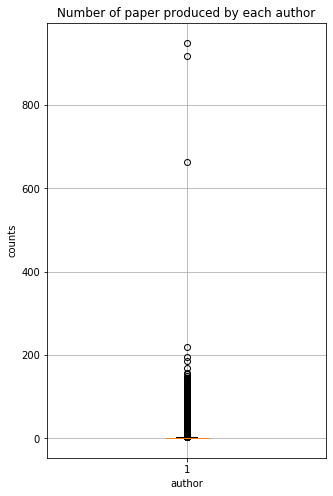

In [13]:
# plot the figure
plt.figure(figsize = (5, 8))
plt.boxplot(num_paper_per_author['counts'])
plt.grid()
plt.xlabel('author')
plt.ylabel('counts')
plt.title('Number of paper produced by each author')
plt.show()

#### Explanation:
1. From the plot above, we can easily see that there are 3 outliers: empty value,  Sheila A. McIlraith, and Satinder P. Singh (ed.). That being said, these 3 authors have more papers published than any other authors in the given dataset. Below we will check further about their publication distribution in conferences.

In [14]:
# Take a look at three possible outliers' number of papers in respective conferences.
num_paper_per_author_per_year = (authors_in_conf
                                .groupby(['author', 'conference'])['paper id']
                                .count()
                                .reset_index()
                                .rename(columns = {'paper id': 'counts'}))

print('Empty Value \n')
print(num_paper_per_author_per_year.reset_index().drop(['index'], axis = 1)[num_paper_per_author_per_year.author == ''])
print('\n\nSheila A. McIlraith \n')
print(num_paper_per_author_per_year.reset_index().drop(['index'], axis = 1)[num_paper_per_author_per_year.author == 'Sheila A. McIlraith'])
print('\n\n Satinder P. Singh (ed.)	\n')
print(num_paper_per_author_per_year.reset_index().drop(['index'], axis = 1)[num_paper_per_author_per_year.author == 'Satinder P. Singh (ed.)'])

Empty Value 

   author conference  counts
0               aaai     108
1              aamas       3
2               accv      38
3                acl     140
4               cvpr      57
5              emnlp      35
6                fgr      12
7              icann      33
8              iccbr      25
9               iccv      21
10              icml      40
11            iconip      50
12              icra      37
13               ida      17
14             ijcai     122
15               ilp      36
16              ksem      13
17             naacl      94
18              nips      50
19            pricai      19


Sheila A. McIlraith 

                     author conference  counts
116099  Sheila A. McIlraith       aaai     904
116100  Sheila A. McIlraith       icml       1
116101  Sheila A. McIlraith      ijcai      13


 Satinder P. Singh (ed.)	

                         author conference  counts
113464  Satinder P. Singh (ed.)       aaai     663


In [13]:
# Check Sheila A. McIlraith's papers in 2018
authors_in_conf[(authors_in_conf['author'] == 'Sheila A. McIlraith') & (authors_in_conf['conference'] == 'aaai') & (authors_in_conf['publication year'] == '2018.0')]

,paper id,publication year,paper title,conference,author
34101,conf/aaai/2018w,2018.0,The Workshops of the The Thirty-Second AAAI Co...,aaai,Sheila A. McIlraith
38936,conf/aaai/2018,2018.0,Proceedings of the Thirty-Second AAAI Conferen...,aaai,Sheila A. McIlraith
134324,conf/aaai/Lorini18,2018.0,In Praise of Belief Bases: Doing Epistemic Log...,aaai,Sheila A. McIlraith
134419,conf/aaai/Abhishek18,2018.0,FgER: Fine-Grained Entity Recognition.,aaai,Sheila A. McIlraith
134513,conf/aaai/Heule18,2018.0,Schur Number Five.,aaai,Sheila A. McIlraith
...,...,...,...,...,...
1062659,conf/aaai/WangYGWKZCTZJ18,2018.0,R3: Reinforced Ranker-Reader for Open-Domain Q...,aaai,Sheila A. McIlraith
1155691,conf/aaai/BondiFHKDCHIJTN18,2018.0,SPOT Poachers in Action: Augmenting Conservati...,aaai,Sheila A. McIlraith
1160767,conf/aaai/BallingerHSSWTM18,2018.0,DeepHeart: Semi-Supervised Sequence Learning f...,aaai,Sheila A. McIlraith
1367572,conf/aaai/KrishnaswamyRAS18,2018.0,A Predictive Analytics Methodology to Assess a...,aaai,Sheila A. McIlraith


In [14]:
# Check Satinder P. Singh (ed.)'s papers
authors_in_conf[(authors_in_conf['author'] == 'Satinder P. Singh (ed.)') & (authors_in_conf['conference'] == 'aaai') & (authors_in_conf['publication year'] == '2017.0')]

,paper id,publication year,paper title,conference,author
36976,conf/aaai/2017,2017.0,Proceedings of the Thirty-First AAAI Conferenc...,aaai,Satinder P. Singh (ed.)
38242,conf/aaai/2017w,2017.0,The Workshops of the The Thirty-First AAAI Con...,aaai,Satinder P. Singh (ed.)
134421,conf/aaai/Luger17,2017.0,Beyond Mechanical Turk: Using Techniques from ...,aaai,Satinder P. Singh (ed.)
134437,conf/aaai/Beckers17,2017.0,AAAI: An Argument Against Artificial Intellige...,aaai,Satinder P. Singh (ed.)
134490,conf/aaai/Sheh17,2017.0,"""Why Did You Do That?"" Explainable Intelligent...",aaai,Satinder P. Singh (ed.)
...,...,...,...,...,...
855321,conf/aaai/KhandpurJNZLSAR17,2017.0,Determining Relative Airport Threats from News...,aaai,Satinder P. Singh (ed.)
856313,conf/aaai/PrakashZHDLQLF17,2017.0,Condensed Memory Networks for Clinical Diagnos...,aaai,Satinder P. Singh (ed.)
955570,conf/aaai/HuRMGBFMBE17,2017.0,Integrating Verbal and Nonvebval Input into a ...,aaai,Satinder P. Singh (ed.)
1053133,conf/aaai/RosuABCCFGLRS17,2017.0,Knowledge-Based Provision of Goods and Service...,aaai,Satinder P. Singh (ed.)


#### Explanation:
1. From our investigation, we find out that Sheila A. McIlraith has published almost 900 papers in 2018, which seems to be impossible. As for Satinder P. Singh, he published 663 papers in AAAI in 2017, and this is bizarre as well. Comparing with each paper id about these authors' works, we can see that the authors' names did not show up matching with the name in the paper id. Also, comparing with the data on dblp ([Sheila A. McIlraith](https://dblp.uni-trier.de/pers/hd/m/McIlraith:Sheila_A=) and [Satinder P. Singh](https://dblp.org/pers/hd/s/Singh:Satinder_P=)), they didn't publish such large number of papers in 2017 and 2018. As a result, we claim that the data about them are contradictory to the real data from dblp website. In addition, we treat empty value in the column of authors as missing data. Therefore, we should remove all of these outliers.

In [15]:
# Remove outliers (change, remove shela in 2018)
authors_in_conf = authors_in_conf[~authors_in_conf['author'].isin(['', 'Sheila A. McIlraith', 'Satinder P. Singh (ed.)'])]

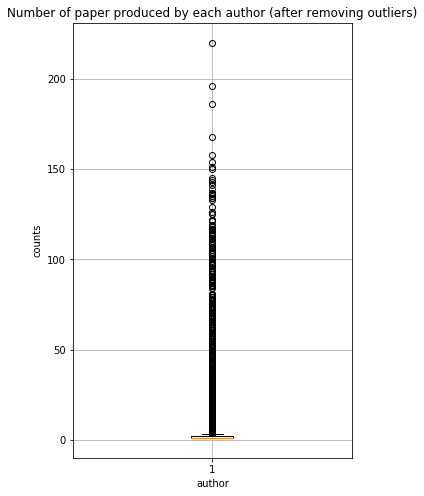

In [16]:
# Create a new plot showing the number of papers per author
num_paper_per_author = (authors_in_conf
                        .groupby('author')['paper id']
                        .count()
                        .reset_index()
                        .rename(columns = {'paper id': 'counts'}))

num_paper_per_author.sort_values(by = ['counts'], ascending = False).reset_index().drop(['index'], axis = 1)

# # plot the figure (change to histogram or keep boxplot)
plt.figure(figsize = (5, 8))
plt.boxplot(num_paper_per_author['counts'])
plt.grid()
plt.xlabel('author')
plt.ylabel('counts')
plt.title('Number of paper produced by each author (after removing outliers)')
plt.show()

***A3.2***

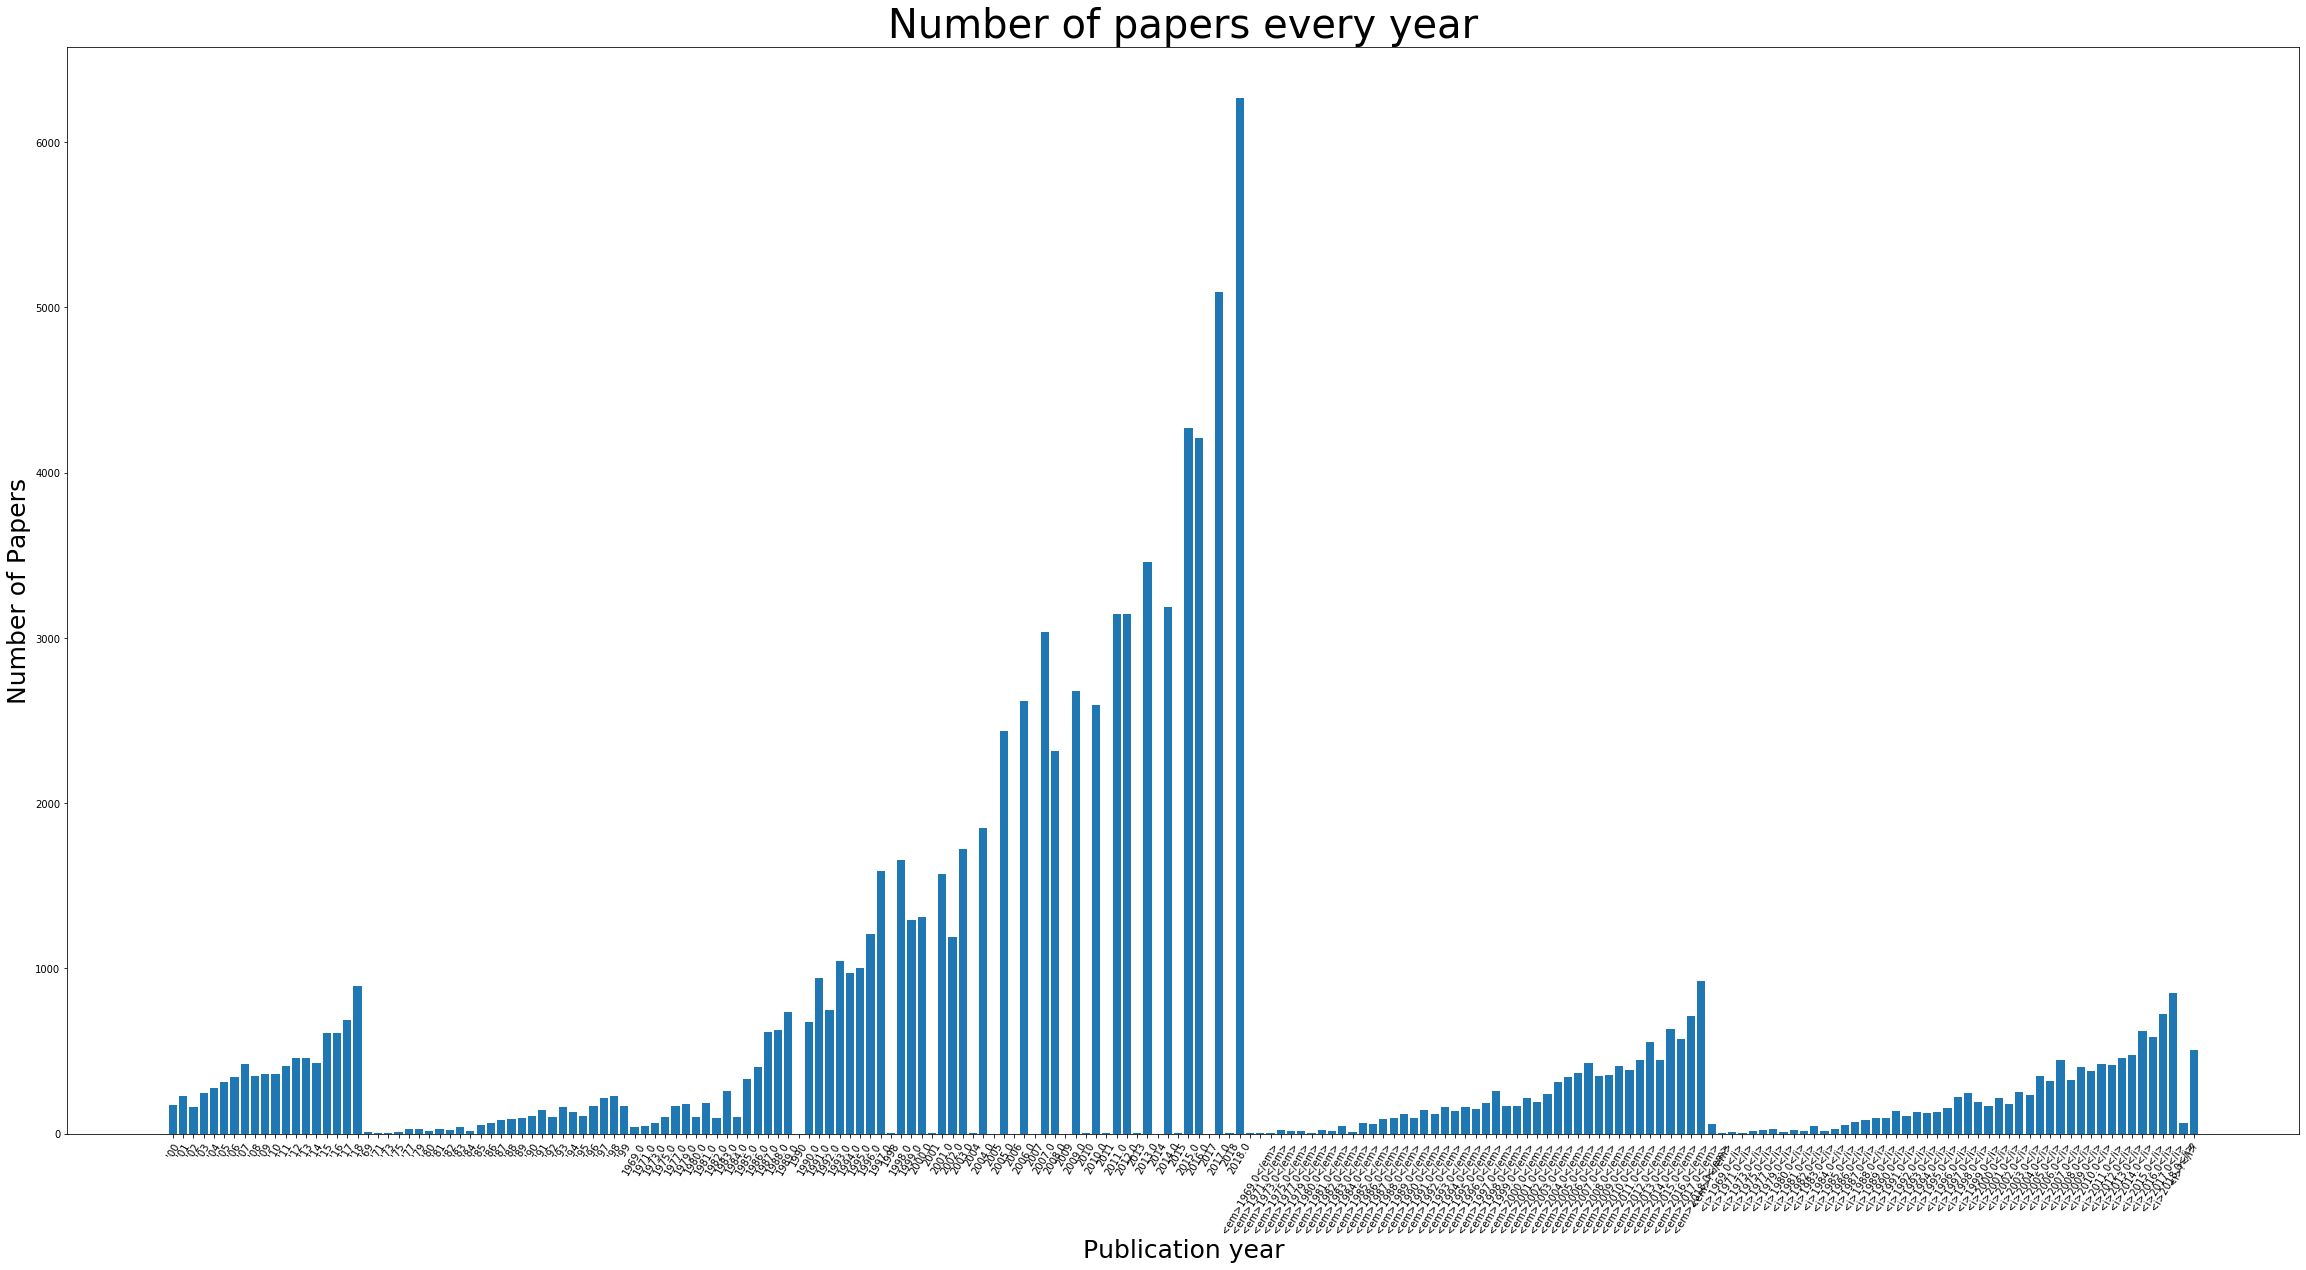

In [17]:
# plot of uncleaned data
num_paper_per_year = ((papers_in_conf.reset_index())
                     .groupby('publication year')['paper id']
                     .count()
                     .reset_index()
                     .rename(columns = {'paper id': 'counts'}))

plt.figure(figsize=(40, 20))
plt.bar(num_paper_per_year['publication year'], num_paper_per_year['counts'])
plt.xticks(rotation=60)
plt.xlabel('Publication year', fontsize= 25)
plt.ylabel('Number of Papers', fontsize = 25)
plt.title('Number of papers every year', fontsize = 40)
plt.show()

#### Explanation:
1. Before cleaning, data in the column of year vary a lot. A lot of different year formats exist in our given dataset. Thus, it is needed to arrange the same format for all of the year data inside the dataset.  

In [18]:
# Clean the data format in the column, "publication year"

# A function recognizes a possible year when the paper is published
def year_recog(year):
    if year[0] == '\'':
        year = year[1:]
        if int(year) < 19:
            return "20"+year
        else:
            return "19"+year
    else:
        return year

# Get rid of unrelevant string components in the column, 'publication year'
authors_in_conf['publication year'] = (authors_in_conf['publication year']
                                       .str.lstrip('<i><em>')
                                       .str.rstrip('</i></em>')
                                       .apply(year_recog)
                                       .apply(lambda year: year[:4] if year != '?' else year))

papers_in_conf['publication year'] = (papers_in_conf['publication year']
                                       .str.lstrip('<i><em>')
                                       .str.rstrip('</i></em>')
                                       .apply(year_recog)
                                       .apply(lambda year: year[:4] if year != '?' else year))


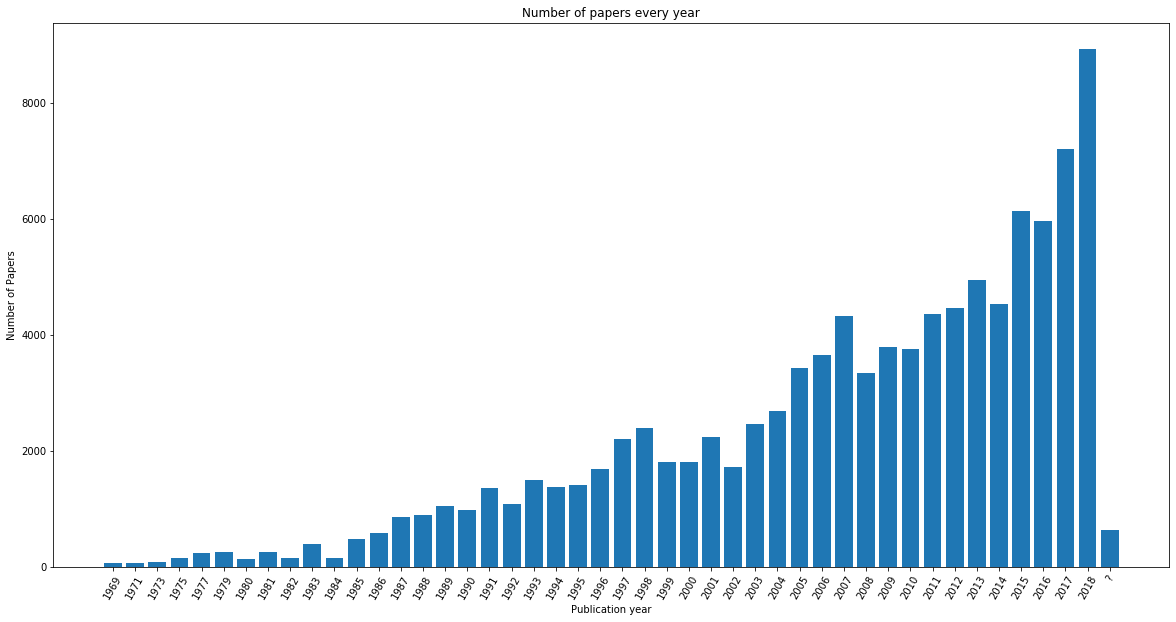

In [19]:
# plot the number of papers per year
num_paper_per_year = ((papers_in_conf.reset_index())
                     .groupby('publication year')['paper id']
                     .count()
                     .reset_index()
                     .rename(columns = {'paper id': 'counts'}))

plt.figure(figsize=(20, 10))
plt.bar(num_paper_per_year['publication year'], num_paper_per_year['counts'])
plt.xticks(rotation=60)
plt.xlabel('Publication year')
plt.ylabel('Number of Papers')
plt.title('Number of papers every year')
plt.show()

#### Explanation:
1. After cleaning, our visualization for number of papers every year becomes much clear and concise. However, there are still some missing year, marked with ?, we cannot resolve yet now.

***A3.3***

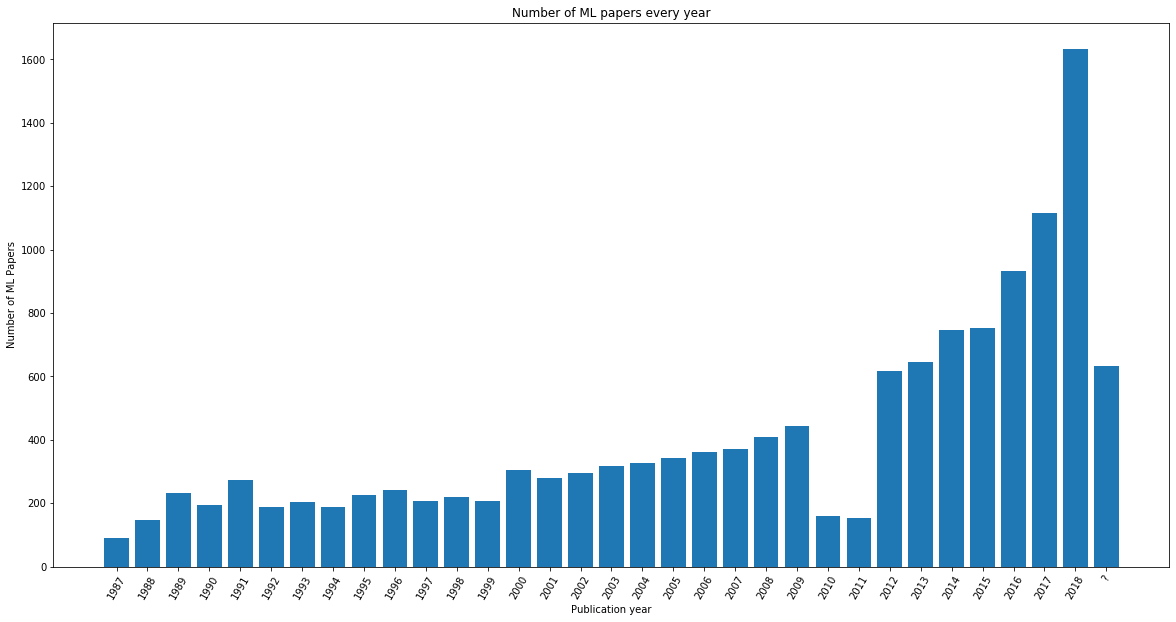

In [20]:
mlconf = ['icml', 'nips']

# create a dataframe called mlpapers
mlpapers = papers_in_conf[papers_in_conf['conference'].isin(mlconf)]

num_mlpaper_per_year = ((mlpapers.reset_index())
                        .groupby('publication year')['paper id']
                        .count()
                        .reset_index()
                        .rename(columns = {'paper id': 'counts'}))
                        
plt.figure(figsize=(20, 10))
plt.bar(num_mlpaper_per_year['publication year'], num_mlpaper_per_year['counts'])
plt.xticks(rotation=60)
plt.xlabel('Publication year')
plt.ylabel('Number of ML Papers')
plt.title('Number of ML papers every year')
plt.show()

#### Explanation:
1. From the plot, we can see that the trend grows almost exponentially. (Ignore the year with "?")
2. However, in 2010 and 2011, number of ML papers sharply drops, violating the trend we expect. Thus, we suspect that there are some missing value in the given dataset.

***A3.4***

In [21]:
# do web scraping from nips website to grasp paper title and corresponding year to dataframe (also need to add authors' name to update missing authors)
r = get('https://papers.nips.cc/')
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')
all_links = soup.find_all('a')
all_data = {'paper title': [], 'publication year':[]}

for link in all_links:
    paper_url = link.get('href')
    if paper_url.startswith('/book'):
        r_paper = get('https://papers.nips.cc/' + paper_url)
        soup_paper = BeautifulSoup(r_paper.text, 'html.parser')
        paper_a_tag = soup_paper.select('ul a')
        for a_tag in paper_a_tag:
            if a_tag['href'].startswith('/paper'):
                all_data['publication year'].append(soup_paper.title.text.split()[1])
                all_data['paper title'].append(a_tag.text)

all_data_df = pd.DataFrame(all_data)
all_data_df.head()

,paper title,publication year
0,Efficient Algorithms for Non-convex Isotonic R...,2018
1,Structure-Aware Convolutional Neural Networks,2018
2,Kalman Normalization: Normalizing Internal Rep...,2018
3,HOGWILD!-Gibbs can be PanAccurate,2018
4,Text-Adaptive Generative Adversarial Networks:...,2018


In [22]:
# remove punctuation in the paper titles for original paper-centric dataframe and web-scraped dataframe
papers_in_conf_comp = papers_in_conf.copy()
papers_in_conf_comp['paper title'] = (papers_in_conf_comp['paper title']
                                      .str.replace(r'[^\w\s]+', '')
                                      .str.normalize('NFKD')
                                      .str.encode('ascii', errors='ignore')
                                      .str.decode('utf-8'))
all_data_df['paper title'] = (all_data_df['paper title']
                              .str.replace(r'[^\w\s]+', '')
                              .str.normalize('NFKD')
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))

# fill in the year value that is missing in the original dataframe
for indx, row in papers_in_conf_comp.iterrows():
    if row['publication year'] == '?':
        paper_title = row['paper title'].replace(r'[^\w\s]+', '')
        if len(all_data_df.loc[all_data_df['paper title'] == paper_title, 'publication year'].values) != 0:
            year = all_data_df.loc[all_data_df['paper title'] == paper_title, 'publication year'].values[0]
            papers_in_conf_comp.at[indx, 'publication year'] = str(year)


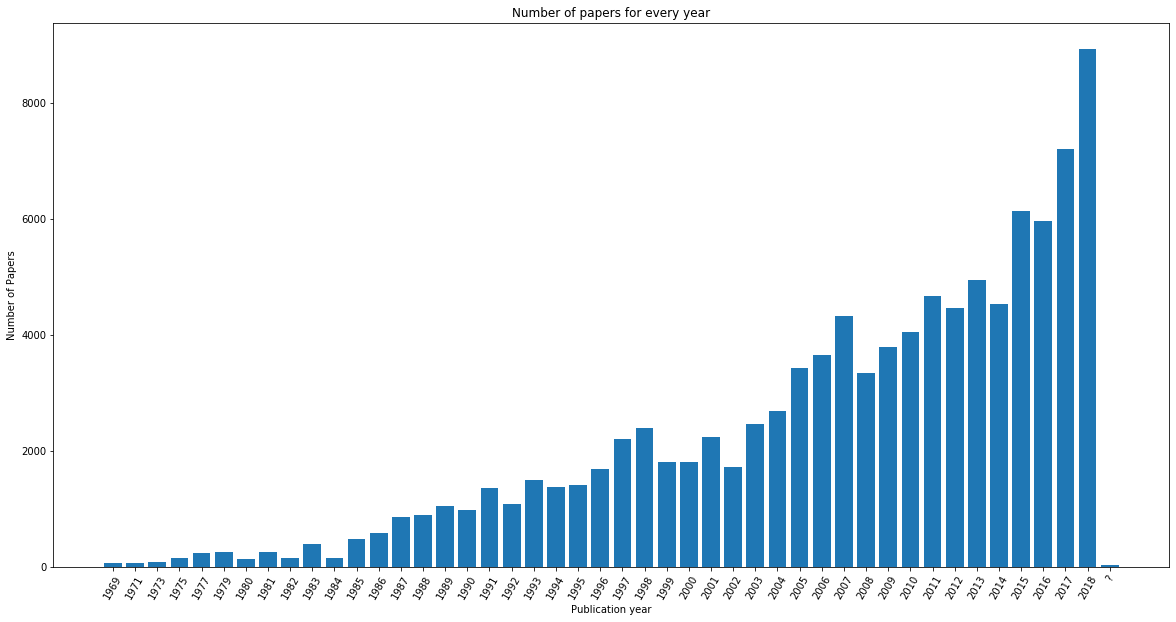

In [23]:
# Make a plot to see number of papers every year 
num_paper_per_year_comp = ((papers_in_conf_comp.reset_index())
                           .groupby('publication year')['paper id']
                           .count()
                           .reset_index()
                           .rename(columns = {'paper id': 'counts'}))
                             
                             
plt.figure(figsize=(20, 10))
plt.bar(num_paper_per_year_comp['publication year'], num_paper_per_year_comp['counts'])
plt.xticks(rotation=60)
plt.xlabel('Publication year')
plt.ylabel('Number of Papers')
plt.title('Number of papers for every year')
plt.show()

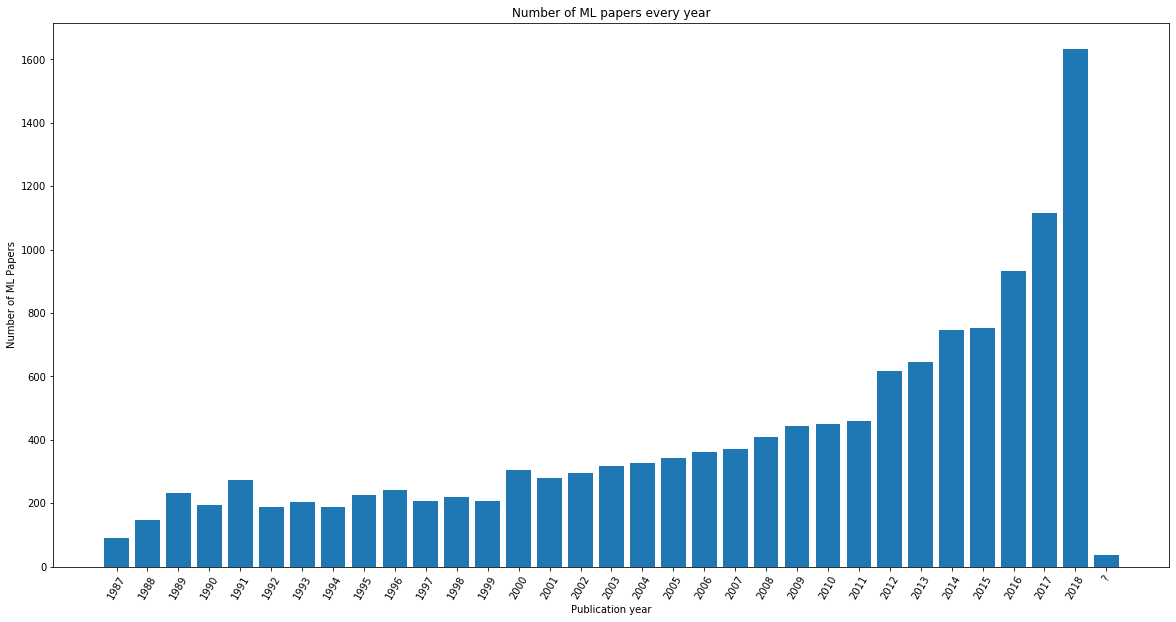

In [24]:
# fill the missing value in both dataframes, papers_in_conf and mlpapers
mlpapers_comp = papers_in_conf_comp[papers_in_conf_comp['conference'].isin(mlconf)]

# make a plot to see number of ML papers every year
num_mlpaper_per_year_comp = ((mlpapers_comp.reset_index())
                        .groupby('publication year')['paper id']
                        .count()
                        .reset_index()
                        .rename(columns = {'paper id': 'counts'}))
                        
plt.figure(figsize=(20, 10))
plt.bar(num_mlpaper_per_year_comp['publication year'], num_mlpaper_per_year_comp['counts'])
plt.xticks(rotation=60)
plt.xlabel('Publication year')
plt.ylabel('Number of ML Papers')
plt.title('Number of ML papers every year')
plt.show()

In [25]:
papers_in_conf[papers_in_conf['publication year'] == '?']

,author names,publication year,paper title,conference
paper id,,,,
conf/nips/WangSJ11,"['Zuoguan Wang', 'Gerwin Schalk', 'Qiang Ji']",?,Anatomically Constrained Decoding of Finger Fl...,nips
conf/nips/BachM10,"['Stephen H. Bach', 'Marcus A. Maloof']",?,A Bayesian Approach to Concept Drift.,nips
conf/nips/RamkumarPHLL11,"['Pavan Ramkumar', 'Sebastian Pannasch', 'Bruc...",?,How Does the Brain Represent Visual Scenes? A ...,nips
conf/nips/KolarBRS11,"['Mladen Kolar', 'Sivaraman Balakrishnan', 'Al...",?,Minimax Localization of Structural Information...,nips
conf/nips/LempitskyZ10,"['Victor S. Lempitsky', 'Andrew Zisserman']",?,Learning To Count Objects in Images.,nips
...,...,...,...,...
conf/nips/WangLSDC10,"['Eric Wang', 'Dehong Liu', 'Jorge G. Silva', ...",?,Joint Analysis of Time-Evolving Binary Matrice...,nips
conf/nips/FroyenFS10,"['Vicky Froyen', 'Jacob Feldman', 'Manish Sing...",?,A Bayesian Framework for Figure-Ground Interpr...,nips
conf/nips/BellalaBS10,"['Gowtham Bellala', 'Suresh K. Bhavnani', 'Cla...",?,Extensions of Generalized Binary Search to Gro...,nips


In [26]:
# remove any paper that still has missing value
papers_in_conf = papers_in_conf[papers_in_conf['publication year'] != '?']
authors_in_conf = authors_in_conf[authors_in_conf['publication year'] != '?']

### A4. Author activity

For each author, calculate their normalized paper count, defined as the total number of papers divided by the author’s period of activity. An author’s period of activity is defined as the number of years between the earliest and latest papers of this author. Plot the distribution of the normalized paper count. What is the appropriate scale for the axes? Does the distribution (roughly) follow a particular law, and if yes, which one?

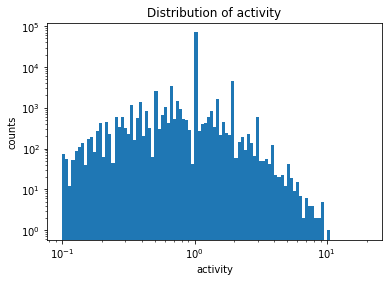

In [55]:
# group the author-centric dataframe by the column, author (suggestion: use seaborn to make plots)
authors_in_conf['publication year'] = authors_in_conf['publication year'].astype(int)
num_paper_per_author_year = (authors_in_conf
                             .groupby('author')
                             .agg({'paper id': 'count', 'publication year': ['max', 'min']})
                             .reset_index()
                             .rename(columns = {'paper id': 'counts'}))
                             
# get rid of redundant double quotes from authors
num_paper_per_author_year['author'] = num_paper_per_author_year['author'].str.strip('\"')

# add a new column indicating the difference between latest year and earliest year
num_paper_per_author_year['diff'] = num_paper_per_author_year['publication year', 'max'] - num_paper_per_author_year['publication year', 'min'] + 1

# add a new column specifying the activity of each author
num_paper_per_author_year['activity'] = num_paper_per_author_year['counts', 'count'] / num_paper_per_author_year['diff']

# show the plot 
plt.hist(num_paper_per_author_year['activity'], bins = np.logspace(np.log10(0.1), np.log10(20), 100))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('counts')
plt.title('Distribution of activity')
plt.show()

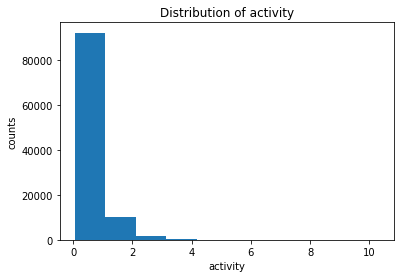

In [57]:
# original activity distribution without log-log axes
plt.hist(num_paper_per_author_year['activity'])
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('counts')
plt.title('Distribution of activity')
plt.show()

#### Explanation:
1. Since the distribution of authors' activity is heavy-tailed, we choose log-log axes. From the plot, it roughly looks like the log normal distribution (in log-log axes).

## Task B. Ranking authors

As you may know, there exist rankings for universities, which represent their relative quality and are used to compare the performance of different universities. In the same vein, there are rankings for conferences and journals, which represent the importance and impact of each conference or journal, and therefore allow for approximate comparisons. In this part, you will rank authors based on different aspects of their research output.

### B1. A Naïve Score

In the absence of citation counts, it is hard to objectively rank the authors based on the impact of their contributions to the field of AI research. A naïve way would be to rank them based on their number of published papers. Obtain such a ranking and analyze your result. Identify and explain some obvious limitations of this scheme.

In [58]:
# construct a dataframe to record the number of papers for each author
author_rank = (authors_in_conf
               .groupby('author')['paper id']
               .count()
               .reset_index()
               .rename(columns = {'paper id': 'number'}))

# remove empty value in author column and rank according to number of papers 
author_rank = author_rank[author_rank['author'] != '']
author_rank = author_rank.sort_values(by = 'number', ascending = False).reset_index().drop('index', axis = 1)
author_rank.head()

,author,number
0,Luc Van Gool,219
1,Toshio Fukuda,196
2,Thomas S. Huang,185
3,Michael I. Jordan,161
4,Trevor Darrell,155
...,...,...
104529,M. Chyba,1
104530,M. Confalone,1
104531,M. Correge,1
104532,M. Cristina Bena,1


#### Explanation:
1. From the naive score, it is hard to tell which conference authors submit their papers. Maybe authors which are productive in publications submit most of their works to low-ranking conferences to increase their personal ranking in naive scoring scheme. What's more, by the naive method, Old researchers are always advantageous comparin to younger ones. Lastly, this method does not consider citations from other researchers.

### B2. H5-index

Another way to score and rank authors could be based on the quality of the conferences and journals where they publish their papers. For this task, you have to use the H5-index score from AMiner (https://aminer.org/ranks/conf) (another database of scholarly publications), which captures the quality of academic conferences: the higher the H5-index, the better the conference.
1. Load the AMiner dataset ( *'aminer_ai.tsv'* available in the folder ``data/``), which contains H5-index values for AI conferences. Load it into a new Pandas dataframe, and join it with the author-centric DBLP dataframe.
2. Calculate a *'new'* author ranking (give each author a score, by which the authors are then sorted in order to obtain the ranking), where each author's score is the sum of the H5-indices of all their papers (the H5-index of a paper being the H5-index of the conference it is published in).
3. Analyze your new, H5-index-based author ranking and explain how and why your results are different from the previous ranking. Do you see any differences in the top-20 authors based on the H5-index-based ranking and the one produced using publication counts? If yes, list the authors that are ranked in the top 20 based on publication counts but absent in the top 20 based on the H5-index-based ranking. Identify the ranks of these authors in the ranking produced by the H5-index based ranking scheme.
4. Now, take the authors in the file `data/list_of_selected_authors.txt`, and compute their rankings using the two (naïve and H5-index-based) ranking schemes. What do you observe? Explain the potential dangers of the naïve, paper-count-based score.
5. On the flip side, do you see any potential dangers of using the H5-index-based score?   
_Hint: Analyze the conferences in which the top ranked authors publish. Investigate the effect of the conferences in which these authors publish more frequently on the obtained ranking._

***B2.1***

In [29]:
# Load AMiner dataset
aminer = pd.read_csv('./data/aminer_ai.csv', sep = ';')
aminer.columns = ['rank', 'conference (full name)', 'conference', 'h5-index']
aminer['conference'] = aminer['conference'].str.lower()

# merge author-centric dataframe and aminer dataframe
authors_in_conf_rank = pd.merge(authors_in_conf, aminer)
authors_in_conf_rank.head()

,paper id,publication year,paper title,conference,author,rank,conference (full name),h5-index
0,conf/iccv/KunoOO90,1990,Object recognition using a feature search stra...,iccv,Yoshinori Kuno,6,International Conference on Computer Vision,58
1,conf/iccv/VedulaBRCK99,1999,Three-Dimensional Scene Flow.,iccv,Sundar Vedula,6,International Conference on Computer Vision,58
2,conf/iccv/MeminP99,1999,Fluid Motion Recovery by Coupling Dense and Pa...,iccv,Étienne Mémin,6,International Conference on Computer Vision,58
3,conf/iccv/DickinsonPR90,1990,Qualitative 3-D shape reconstruction using dis...,iccv,Sven J. Dickinson,6,International Conference on Computer Vision,58
4,conf/iccv/SinghYL17,2017,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv,Avi Singh,6,International Conference on Computer Vision,58


***B2.2***

In [30]:
# Create a dataframe containing authors' total h5-index score in each conference
author_rank_comp = (authors_in_conf_rank
                    .groupby(['author', 'conference'])['h5-index']
                    .sum()
                    .reset_index()
                    .rename(columns = {'h5-index': 'score'}))

# Group authors in the dataframe and count their total h5-index score 
author_rank_comp = author_rank_comp.groupby('author')['score'].sum().reset_index()
author_rank_comp = author_rank_comp.sort_values(by = 'score', ascending = False).reset_index().drop('index', axis = 1)
author_rank_comp.head()

,author,score
0,Luc Van Gool,18644
1,Thomas S. Huang,14001
2,Xiaoou Tang,13190
3,Trevor Darrell,12610
4,Shuicheng Yan,12397


***B2.3***

In [31]:
# check the top 20 authors who have more number of papers in both dataframes based on publication counts and h5-index
print('Top 20 author rankings base on 2 ranking scheme: \n')
print('Ranking base on paper counts: \n', author_rank.head(20))
print('\n\nRanking base on H5-index: \n', author_rank_comp.head(20))

Top 20 author rankings base on 2 ranking scheme: 

Ranking base on paper counts: 
                     author  number
0             Luc Van Gool     219
1            Toshio Fukuda     196
2          Thomas S. Huang     185
3        Michael I. Jordan     161
4           Trevor Darrell     155
5            Shuicheng Yan     153
6             Takeo Kanade     150
7              Xiaoou Tang     150
8             Vijay Kumar      145
9                 Dan Roth     144
10          Larry S. Davis     143
11         Wolfram Burgard     141
12               Yang Liu      139
13         Roland Siegwart     137
14          Marc Pollefeys     135
15  Christopher D. Manning     135
16          Martial Hebert     134
17               Dan Klein     134
18        Andrew Zisserman     131
19            Eric P. Xing     130


Ranking base on H5-index: 
                author  score
0        Luc Van Gool  18644
1     Thomas S. Huang  14001
2         Xiaoou Tang  13190
3      Trevor Darrell  12610
4      

#### Explanation:
1. Apparently, we can see that these two ranking schemes result in different top 20 author lists. For example, Vijay Kumar is one of the top 20 authors in the publication-count ranking system, but he is not in the h5-index scoring ranking system. Therefore, we will check further if there are other authors that are in publication count ranking system but not in h5-index scoring system.

In [32]:
# see the difference between top 20 authors in the dataframe based on paper counts and the dataframe according to h5-index 
df_diff = author_rank[:20].merge(author_rank_comp[:20], how = 'outer', on = 'author')

# list all the data that are in the dataframe based on paper counts but not in the dataframe based on h5-index
# (merge author with h5-index score and their ranking)
num_paper_more_author = df_diff[df_diff['score'].isna()]
print('\nTop 20 authors in paper-count based ranking but not in h5-index based dataframe: \n')
num_paper_more_author


Top 20 authors in paper-count based ranking but not in h5-index based dataframe: 



,author,number,score
8,Vijay Kumar,145.0,NaN
9,Dan Roth,144.0,NaN
11,Wolfram Burgard,141.0,NaN
12,Yang Liu,139.0,NaN
13,Roland Siegwart,137.0,NaN
15,Christopher D. Manning,135.0,NaN
17,Dan Klein,134.0,NaN
19,Eric P. Xing,130.0,NaN


In [33]:
# Identify the ranks of these authors in the ranking produced by the H5-index based ranking scheme
pd.options.mode.chained_assignment = None 
not_in_h5_list = author_rank_comp[author_rank_comp['author'].isin(num_paper_more_author['author'])]
not_in_h5_list['ranking'] = not_in_h5_list.index + 1
print('Show the ranking base on h5-index scoring of those that are top 20 in publication count ranking but not in h5-index ranking \n')
not_in_h5_list

Show the ranking base on h5-index scoring of those that are top 20 in publication count ranking but not in h5-index ranking 



,author,score,ranking
21,Vijay Kumar,8504,22
27,Roland Siegwart,8111,28
31,Wolfram Burgard,7879,32
35,Eric P. Xing,7455,36
61,Yang Liu,5990,62
63,Dan Roth,5933,64
70,Christopher D. Manning,5606,71
87,Dan Klein,5314,88


***B2.4***

In [34]:
# Load data from text file to a dataframe
authors_from_txt = pd.read_csv('./data/list_of_selected_authors.txt', header = None)
authors_from_txt.columns = {'author'}

# Create a dataframe storing information about specified authors' names, number of papers, and their h5-index scores
temp = author_rank[author_rank['author'].isin(authors_from_txt['author'])]
authors_from_txt = authors_from_txt.merge(temp, how = 'outer', on = 'author')
temp = author_rank_comp[author_rank_comp['author'].isin(authors_from_txt['author'])]
authors_from_txt = authors_from_txt.merge(temp, how = 'outer', on = 'author')
authors_from_txt

,author,number,score
0,Parag Havaldar,2,170
1,Steffen Abraham,2,170
2,Yukihiro Nakamura,2,170
3,Iljung S. Kwak,2,170
4,Charles Freundlich,2,170
5,Mengjie Zhang,13,140
6,Naokazu Yokoya,11,158
7,Sebastian Otte,10,148
8,Jianwu Dang,10,122
9,Hy Murveit,17,170


In [35]:
# Rank the authors according to the naive method
print('Show the ranking according to paper counting based scheme \n')
authors_from_txt.sort_values(by = 'number', ascending = False).reset_index().drop('index', axis = 1)

Show the ranking according to paper counting based scheme 



,author,number,score
0,Hy Murveit,17,170
1,Mengjie Zhang,13,140
2,Naokazu Yokoya,11,158
3,Sebastian Otte,10,148
4,Jianwu Dang,10,122
5,Parag Havaldar,2,170
6,Steffen Abraham,2,170
7,Yukihiro Nakamura,2,170
8,Iljung S. Kwak,2,170
9,Charles Freundlich,2,170


In [36]:
# Rank the authors base on h5-index scores 
print('Show the ranking according to h5-index based scheme \n')
authors_from_txt.sort_values(by = 'score', ascending = False).reset_index().drop('index', axis = 1)

Show the ranking according to h5-index based scheme 



,author,number,score
0,Parag Havaldar,2,170
1,Steffen Abraham,2,170
2,Yukihiro Nakamura,2,170
3,Iljung S. Kwak,2,170
4,Charles Freundlich,2,170
5,Hy Murveit,17,170
6,Naokazu Yokoya,11,158
7,Sebastian Otte,10,148
8,Mengjie Zhang,13,140
9,Jianwu Dang,10,122


In [ ]:
# (create a plot to see the difference between paper-count scheme and h5-index scheme)

#### Explanation:
1. Ranking based on publication count does not take into account the quality of the conferences. This leads to an over-estimation of authors that publish many papers in low-quality conferences and, vice versa, under-estimation of authors tha publish a few papers but for high quality conferences.

***B2.5***

In [37]:
# build a pivot table to show the top 20 authors' papers in each conference
num_conf_author = authors_in_conf.groupby(['author', 'conference'])['paper title'].count().reset_index().rename(columns = {'paper title': 'number'})
num_conf_top_author = num_conf_author[num_conf_author['author'].isin((author_rank_comp[:20])['author'].tolist())]
num_conf_top_author_pivot = num_conf_top_author.pivot(index = 'author', columns = 'conference', values = 'number')
num_conf_top_author_pivot.fillna(0, inplace = True)
num_conf_top_author_pivot = num_conf_top_author_pivot.astype(int)
num_conf_top_author_pivot

conference,aaai,accv,acl,cvpr,emnlp,fgr,icann,iccv,icml,icra,ijcai,naacl,nips
author,,,,,,,,,,,,,
Alan L. Yuille,5,0,0,56,1,0,0,26,3,1,3,1,26
Andrew Zisserman,0,14,0,61,0,6,0,38,0,1,0,0,11
Bernt Schiele,1,4,0,70,0,0,0,15,1,2,0,0,6
Jitendra Malik,1,0,0,63,0,0,0,34,2,3,3,0,10
Larry S. Davis,2,10,0,73,0,8,0,33,1,8,2,1,5
Luc Van Gool,3,16,0,132,0,5,1,46,1,10,0,0,5
Marc Pollefeys,0,9,0,71,0,0,0,32,2,19,0,0,2
Martial Hebert,6,1,0,57,0,1,0,26,1,35,2,0,5
Michael I. Jordan,1,0,2,3,1,0,0,2,47,1,1,2,101


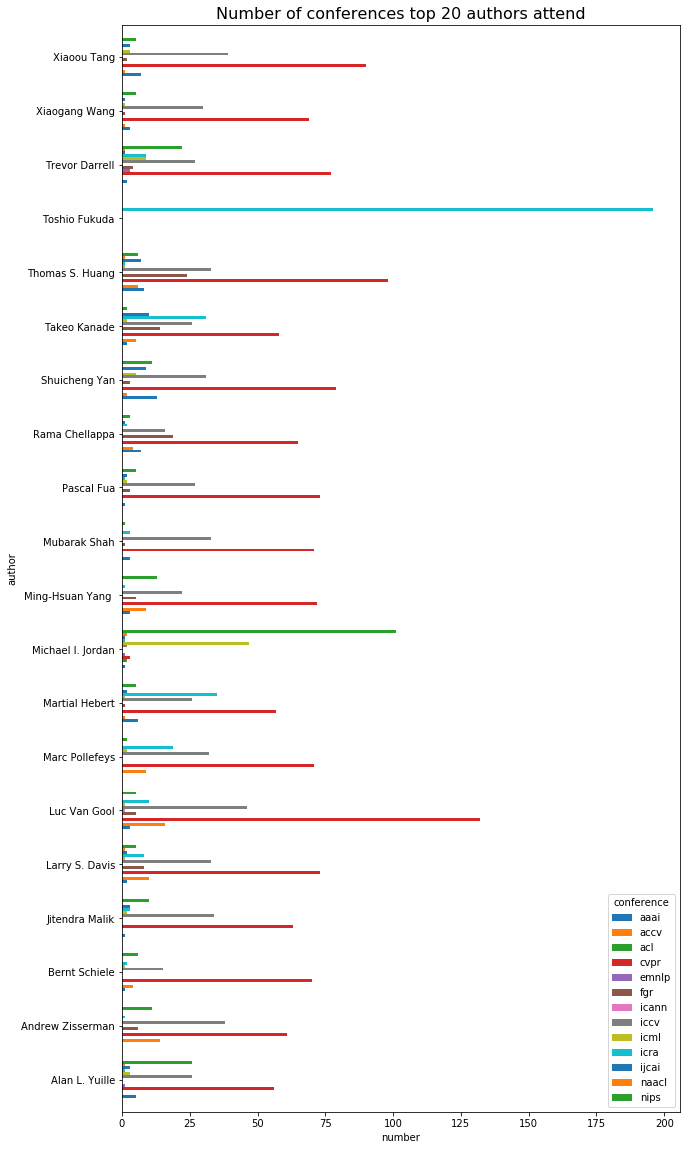

In [38]:
# make a plot to see top 20 authors' publications in various conferences
num_conf_top_author_pivot.plot(kind = 'barh', width = 0.7, figsize = (10, 20), align='center')
plt.tick_params(axis = 'y', which = 'major', labelsize = 10)
plt.xlabel('number', fontsize = 10)
plt.title('Number of conferences top 20 authors attend', fontsize = 16)
plt.show()

In [ ]:
# (add michele plot here)

#### Explanation:
1. From the figure, we can see that these top 20 authors publish their papers more in the conferences which have higher h5-index scores. Specifically, almost every author in the list has more papers published in CVPR, which worths of 112 points in h5 index. As a result, they could obtain more points in h5-index score, improving their ranking. 

### B3. And Justice For All

An ideal ranking scheme should not give undue advantage to authors who have been conducting research for a longer period of time and therefore have naturally published more papers when compared to a junior researcher. Does the ranking scheme designed by you in ``Step 2`` take this factor into account? If not, introduce variations in your ranking scheme to mitigate this effect. Do you observe anything odd with this new ranking? Clearly explain your observations.

_Hint: What you did in part A4 may be useful here._

In [39]:
# create a temporary dataframe containing information about authors and year difference (max_year - min_year) 
te = num_paper_per_author_year[['author', 'diff']]
te.columns = te.columns.get_level_values(0)
te.head()

,author,diff
0,A Min Tjoa,2
1,A-Chuan Hsueh,1
2,A-Yeon Park,1
3,A. A. Clark,1
4,A. A. Jimoh,1


In [40]:
# create a new column indicating the average h5-index score for each author
num_paper_per_author_year_h5 = te.merge(author_rank_comp, on = 'author')
num_paper_per_author_year_h5['h5-index avg'] = round(num_paper_per_author_year_h5['score'] / num_paper_per_author_year_h5['diff'], 3)
num_paper_per_author_year_h5.head()

,author,diff,score,h5-index avg
0,A Min Tjoa,2,12,6.0
1,A-Chuan Hsueh,1,44,44.0
2,A-Yeon Park,1,1,1.0
3,A. A. Clark,1,112,112.0
4,A. A. Jimoh,1,8,8.0


In [41]:
# top 20 authors according to average h5-index score
# (add new metric: (total h5-index score + number of paper * average of h5-index score for each conference involved) / year difference)
num_paper_per_author_year_h5.sort_values(by = 'h5-index avg', ascending = False)[:20]

,author,diff,score,h5-index avg
52070,Li Fei-Fei,3,2860,953.333
96064,Xiaoou Tang,16,13190,824.375
82015,Shuicheng Yan,17,12397,729.235
40775,Jiashi Feng,8,5607,700.875
53531,Luc Van Gool,29,18644,642.897
95808,Xiaogang Wang,16,9957,622.312
95723,Xiaodan Liang,4,2364,591.000
79882,Sergey Levine,7,3829,547.000
84088,Stefanos Zafeiriou,10,5139,513.900
51713,Lei Zhang,16,8201,512.562


#### Explanation:
1. In the new scheme, we not only take total h5-index score into account, but mainly consider  h5-index average. Therefore, from the above dataframe, we can see that some excellent authors could obtain high h5-index scores just by several years. For instance, Li Fei-Fei spent only 3 years to get 2860 points in h5-index score. As a result, we conclude that using h5-index average can be more objective to evaluate authors.

## Task C. Trending topics

Historically, the field of AI has witnessed research in two broad flavors: “symbolic” (logic, planning, control, etc.) vs. “connectionist” (neural networks, deep learning, Bayesian methods, etc.). Let’s see if we can see how the popularity of these two approaches to AI is reflected in the DBLP data.

To this end, construct two dataframes: ``symbolic`` and ``connectionist``. ``symbolic`` is your paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words (not differentiating between upper and lower case letters): “logic”, “planning”, “control”; ``connectionist`` is a dataframe constructed in a similar manner, but with the words “deep”, “learning”, “feature”, “bayesian”. Plot the number of papers per year for ``symbolic`` and ``connectionist`` separately (i.e., 2 plots).
1. Describe the trends you observe. Based on these plots alone, what might one conclude about the popularity of the two approaches to AI?
2. Moving beyond these plots, what do you, as a careful data scientist, conclude about the popularity of symbolic vs. connectionist AI? Corroborate your reasoning with further plots.

_Note: You could use the text handling utilities below to clean the text in the paper titles._

In [42]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [43]:
# remove stopwords and punctuation, lower every character in paper titles as well
paper_title_year = papers_in_conf[['paper title', 'publication year']]
word_list = ((paper_title_year['paper title'].apply(lowercase_all)).apply(remove_punct)).apply(stopword_remover)
word_list.name = 'words'
paper_title_year = pd.concat([paper_title_year, word_list], axis = 1)
paper_title_year.head()

,paper title,publication year,words
paper id,,,
conf/iccv/KunoOO90,Object recognition using a feature search stra...,1990,object recognition using feature search strate...
conf/iccv/VedulaBRCK99,Three-Dimensional Scene Flow.,1999,threedimensional scene flow
conf/iccv/MeminP99,Fluid Motion Recovery by Coupling Dense and Pa...,1999,fluid motion recovery coupling dense parametri...
conf/iccv/DickinsonPR90,Qualitative 3-D shape reconstruction using dis...,1990,qualitative 3d shape reconstruction using dist...
conf/iccv/SinghYL17,GPLAC: Generalizing Vision-Based Robotic Skill...,2017,gplac generalizing visionbased robotic skills ...


In [44]:
# calculate the symbolic count
words_symbolic = ['logic', 'planning', 'control']
pattern = '|'.join(words_symbolic)
symbolic = paper_title_year[['words', 'publication year']]
symbolic['symbolic count'] = (paper_title_year['words'].str.contains(pattern)).astype(int)
symbolic.head()

,words,publication year,symbolic count
paper id,,,
conf/iccv/KunoOO90,object recognition using feature search strate...,1990,0
conf/iccv/VedulaBRCK99,threedimensional scene flow,1999,0
conf/iccv/MeminP99,fluid motion recovery coupling dense parametri...,1999,0
conf/iccv/DickinsonPR90,qualitative 3d shape reconstruction using dist...,1990,0
conf/iccv/SinghYL17,gplac generalizing visionbased robotic skills ...,2017,0


In [45]:
# group them for each year
symbolic_group_year = symbolic.groupby('publication year')['symbolic count'].sum().reset_index()
symbolic_group_year.head()

,publication year,symbolic count
0,1969,5
1,1971,8
2,1973,12
3,1975,14
4,1977,21


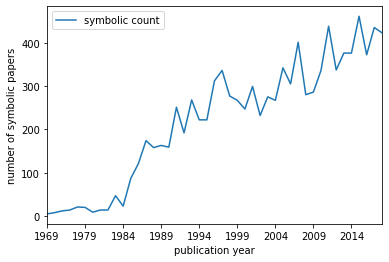

In [46]:
# make a plot
symbolic_group_year.plot(x = 'publication year', y = 'symbolic count')
plt.ylabel('number of symbolic papers')
plt.show()

In [47]:
words_connectionist = ['deep', 'learning', 'feature', 'bayesian']
pattern = '|'.join(words_connectionist)
connectionist = paper_title_year[['words', 'publication year']]
connectionist['connectionist count'] = (paper_title_year['words'].str.contains(pattern)).astype(int)
connectionist.head()

,words,publication year,connectionist count
paper id,,,
conf/iccv/KunoOO90,object recognition using feature search strate...,1990,1
conf/iccv/VedulaBRCK99,threedimensional scene flow,1999,0
conf/iccv/MeminP99,fluid motion recovery coupling dense parametri...,1999,0
conf/iccv/DickinsonPR90,qualitative 3d shape reconstruction using dist...,1990,0
conf/iccv/SinghYL17,gplac generalizing visionbased robotic skills ...,2017,0


In [48]:
connectionist_group_year = connectionist.groupby('publication year')['connectionist count'].sum().reset_index()
connectionist_group_year.head()

,publication year,connectionist count
0,1969,4
1,1971,0
2,1973,1
3,1975,7
4,1977,9


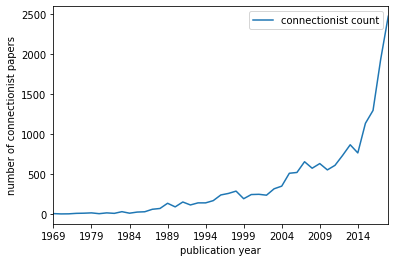

In [49]:
# make a plot
connectionist_group_year.plot(x = 'publication year', y = 'connectionist count')
plt.ylabel('number of connectionist papers')
plt.show()

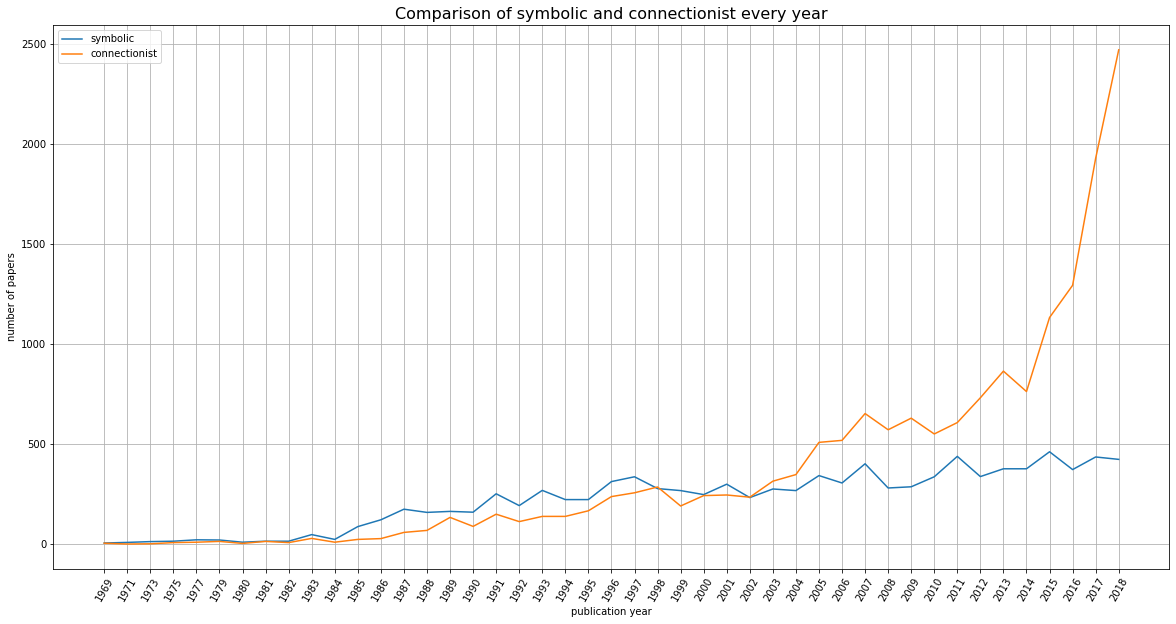

In [50]:
# compare symbolic and connectionists
plt.figure(figsize = (20, 10))
plt.plot(symbolic_group_year['publication year'], symbolic_group_year['symbolic count'], label = 'symbolic')
plt.plot(connectionist_group_year['publication year'], connectionist_group_year['connectionist count'], label = 'connectionist')
plt.xlabel('publication year')
plt.ylabel('number of papers')
plt.title('Comparison of symbolic and connectionist every year', fontsize = 16)
plt.xticks(rotation = 60)
plt.grid()
plt.legend()
plt.show()

#### Explanation:
1. From the plots of symbolic and  connectionist, we can see that in the early stage (from 1990s to early 2000s) symbolic AI research dominates, meaning that more papers published at that time. However, in recent years, connectionist AI research overwhelming dominates over symbolic one. In addition, the gap of the number of publications becomes larger and larger by years.

2. For us, according to the trend from the plot, we predict that connectionist AI research will become more popular than symbolic AI research. To be more specific, the difference between them will be enlarged in future years, making connectionist to be the mainstream of AI research.